# EOSC 410 Final Project

### Thoughts on methodologies
Without using watershed data:
* Can use multiple linear regression as a simple baseline model. This will be used to benchmark the performance of more complex models.
* Neural network ensemble: train multiple neural networks with different hidden layer sizes and parameters
* CNN: use convolutional neural networks to capture spatial information

Using watershed data:
* Can interpolate the remote sensing data to the watershed boundaries and train a different model for each watershed.
* Can train a linear regression model and neural network ensemble for each watershed.
* Can also just use precipitation data and identify the amount of water that flows into each watershed per day and use a time series of just the precipitation data to predict the streamflow for each station.

### Thoughts on data preprocessing and data input
* Streamflow data may have missing data points. We can use interpolation to fill these in.
* Output would be the next day's streamflow for each station
* Start with the past 365 days of input data
* 

In [2]:
import numpy as np
import pandas as pd

In [3]:
streamwater_data = pd.read_csv("data/streamflow_data/Final_Processed_Station_Data_Watershed.csv")
streamwater_data.dropna(inplace=True)
streamwater_data

C:\Users\tbwil\AppData\Local\Temp\ipykernel_3412\3925566811.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241) have mixed types. Specify dtype option on import or 

,name,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
0,lat,50.93759,49.239,49.50195,55.12986,49.15912,49.36992,49.20763,52.36008,55.42654,...,50.28432,49.24928,50.23847,51.67917,49.14767,49.16981,49.70292,50.21222,50.91261,50.13569
1,lon,-119.65634,-122.57975,-117.26128,-129.35494,-116.45249,-124.98411,-119.99352,-126.00586,-126.69763,...,-118.94704,-119.32139,-119.26689,-127.17917,-122.53187,-118.97506,-119.09247,-119.53861,-122.23931,-126.82006
2,major_watershed,South Thompson River,Fraser River,Lower Kootenay River,Nass River,Lower Kootenay River,Vancouver Island (West) Rivers,Okanagan River,North Coast Rivers,Babine River,...,South Thompson River,Okanagan River,Okanagan River,North Coast Rivers,Fraser River,Kettle River,Kettle River,Okanagan River,Fraser River,Vancouver Island (West) Rivers
3,2011-01-01,21.10065052,3.950658369,0.026633333,0.175258698,0.49568895,12.29111538,1.690907985,-126.00586,15.4966629,...,0.067015878,0.083,0.075272787,99.95522759,0.072746181,1.596026005,0.401,0.04718573,1.238667116,0.176193638
4,2011-01-02,20.69611806,3.74086273,0.0249375,0.163091831,0.485078758,11.49209615,1.755803793,-120.3616256,15.25197908,...,0.067070577,0.081,0.07749122,94.00841842,0.052530297,1.552300933,0.392296896,0.047,1.195453978,0.147495593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2019-12-27,28.35601763,3.805006418,0.035264969,0.206954232,0.32644878,12.9119907,2.653639316,15.6579357,40.92694928,...,0.152302505,0.132262499,0.931793229,90.35042853,0.185841803,2.48919843,0.589289725,0.044274653,2.09906261,0.692392271
3286,2019-12-28,28.01791851,3.672696601,0.03400306,0.19882236,0.315455665,12.30531204,2.619591235,15.62701205,41.03352373,...,0.150731594,0.133782507,0.933848909,85.67016027,0.162655089,2.476254645,0.653278906,0.041977431,2.175908629,2.119497424
3287,2019-12-29,27.64810612,3.562182615,0.032415759,0.208702174,0.308788651,12.85874418,2.581987854,15.34367393,40.16380521,...,0.150072704,0.137598129,0.930116518,86.62217877,0.148739875,2.477790057,0.671989393,0.043691667,2.16848825,1.645608303
3288,2019-12-30,27.34101117,3.890749246,0.031493239,0.231638281,0.304362167,13.69794892,2.549899999,15.09039204,40.01387482,...,0.148394006,0.141737156,0.931532967,87.42211774,0.185196466,2.520690667,0.682877324,0.049514583,2.115560141,1.983826578


In [4]:
station_lats = streamwater_data.iloc[0][1:]
station_lons = streamwater_data.iloc[1][1:]
watersheds = streamwater_data.iloc[2][1:]

# drop the first 3 rows
streamwater_data = streamwater_data.drop([0, 1, 2])
# drop the first column
streamwater_data = streamwater_data.drop(columns=["name"])
streamwater_data

,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,BAKER CREEK AT QUESNEL,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
3,21.10065052,3.950658369,0.026633333,0.175258698,0.49568895,12.29111538,1.690907985,-126.00586,15.4966629,0.779153314,...,0.067015878,0.083,0.075272787,99.95522759,0.072746181,1.596026005,0.401,0.04718573,1.238667116,0.176193638
4,20.69611806,3.74086273,0.0249375,0.163091831,0.485078758,11.49209615,1.755803793,-120.3616256,15.25197908,0.777871857,...,0.067070577,0.081,0.07749122,94.00841842,0.052530297,1.552300933,0.392296896,0.047,1.195453978,0.147495593
5,20.41219444,3.620702514,0.023570833,0.166408284,0.486131451,10.89227885,1.819792735,-114.7173912,15.24676794,0.772798248,...,0.067068786,0.079,0.079711087,87.54622424,0.036934418,1.541753419,0.383060452,0.061245829,1.150700696,0.136078302
6,20.20394097,3.528421344,0.024729167,0.178720242,0.498147361,10.45515385,1.879250556,-109.0731568,15.61665381,0.768036968,...,0.067029062,0.077,0.082849452,82.19820256,0.03522922,1.570496978,0.373180231,0.06697541,1.107009056,0.183736437
7,20.19361806,5.366123781,0.02485,0.188595334,0.509199711,11.02450962,1.930552369,-103.4289224,16.03490063,0.763594196,...,0.066954084,0.075,0.087452934,85.33382358,0.458727663,1.617610631,0.362545801,0.063745292,1.066980755,2.73458579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,28.35601763,3.805006418,0.035264969,0.206954232,0.32644878,12.9119907,2.653639316,15.6579357,40.92694928,2.58443689,...,0.152302505,0.132262499,0.931793229,90.35042853,0.185841803,2.48919843,0.589289725,0.044274653,2.09906261,0.692392271
3286,28.01791851,3.672696601,0.03400306,0.19882236,0.315455665,12.30531204,2.619591235,15.62701205,41.03352373,2.572821001,...,0.150731594,0.133782507,0.933848909,85.67016027,0.162655089,2.476254645,0.653278906,0.041977431,2.175908629,2.119497424
3287,27.64810612,3.562182615,0.032415759,0.208702174,0.308788651,12.85874418,2.581987854,15.34367393,40.16380521,2.595999797,...,0.150072704,0.137598129,0.930116518,86.62217877,0.148739875,2.477790057,0.671989393,0.043691667,2.16848825,1.645608303
3288,27.34101117,3.890749246,0.031493239,0.231638281,0.304362167,13.69794892,2.549899999,15.09039204,40.01387482,2.798730865,...,0.148394006,0.141737156,0.931532967,87.42211774,0.185196466,2.520690667,0.682877324,0.049514583,2.115560141,1.983826578


# Create training, validation, and test sets

In [5]:
# define the dataset splits
pct_train = 0.75
pct_val = 0.15
pct_test = 0.15

# define the number of samples
n_samples = streamwater_data.shape[0]
n_train = int(n_samples * pct_train)
n_val = int(n_samples * pct_val)
n_test = n_samples - n_train - n_val

In [6]:
# normalize the streamwater data by station
streamwater_data = streamwater_data.astype(float)
streamwater_data = (streamwater_data - streamwater_data.mean()) / streamwater_data.std()
streamwater_data

,ADAMS RIVER NEAR SQUILAX,ALOUETTE RIVER NEAR HANEY,ANDERSON CREEK NEAR NELSON,ANSEDAGAN CREEK NEAR NEW AIYANSH,ARROW CREEK NEAR ERICKSON,ASH RIVER BELOW MORAN CREEK,ASHNOLA RIVER NEAR KEREMEOS,ATNARKO RIVER NEAR THE MOUTH,BABINE RIVER AT OUTLET OF NILKITKWA LAKE,BAKER CREEK AT QUESNEL,...,VANCE CREEK BELOW DEAFIES CREEK,VASEUX CREEK ABOVE SOLCO CREEK,VERNON CREEK AT OUTLET OF KALAMALKA LAKE,WANNOCK RIVER AT OUTLET OF OWIKENO LAKE,WEST CREEK NEAR FORT LANGLEY,WEST KETTLE RIVER AT WESTBRIDGE,WEST KETTLE RIVER NEAR MCCULLOCH,WHITEMAN CREEK ABOVE BOULEAU CREEK,YALAKOM RIVER ABOVE ORE CREEK,ZEBALLOS RIVER AT MOOK PEAK
3,-0.785401,-0.268903,-0.479555,-0.785277,-0.486076,-0.201473,-0.455028,-4.732882,-0.845655,-0.482687,...,-0.504808,-0.410423,-0.849717,-1.003534,-0.557085,-0.484096,-0.480071,-0.407850,-0.787398,-0.503214
4,-0.791255,-0.304476,-0.486931,-0.798453,-0.490017,-0.233665,-0.450880,-4.561446,-0.850918,-0.482798,...,-0.504753,-0.411396,-0.847958,-1.031152,-0.587438,-0.485694,-0.481361,-0.407959,-0.796947,-0.517114
5,-0.795364,-0.324851,-0.492876,-0.794862,-0.489626,-0.257831,-0.446790,-4.390009,-0.851030,-0.483236,...,-0.504754,-0.412369,-0.846197,-1.061162,-0.610854,-0.486080,-0.482730,-0.399546,-0.806836,-0.522644
6,-0.798378,-0.340499,-0.487838,-0.781528,-0.485164,-0.275443,-0.442990,-4.218572,-0.843074,-0.483647,...,-0.504795,-0.413343,-0.843708,-1.085998,-0.613415,-0.485029,-0.484195,-0.396162,-0.816491,-0.499561
7,-0.798527,-0.028891,-0.487312,-0.770833,-0.481059,-0.252504,-0.439711,-4.047135,-0.834078,-0.484030,...,-0.504872,-0.414316,-0.840057,-1.071437,0.022445,-0.483307,-0.485771,-0.398069,-0.825336,0.735915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,-0.680404,-0.293600,-0.442012,-0.750950,-0.548925,-0.176459,-0.393492,-0.430018,-0.298667,-0.326879,...,-0.417670,-0.386452,-0.170389,-1.048139,-0.387278,-0.451447,-0.452158,-0.409569,-0.597273,-0.253199
3286,-0.685297,-0.316035,-0.447500,-0.759757,-0.553007,-0.200901,-0.395668,-0.430957,-0.296375,-0.327881,...,-0.419275,-0.385712,-0.168758,-1.069875,-0.422092,-0.451920,-0.442672,-0.410926,-0.580292,0.438004
3287,-0.690649,-0.334774,-0.454404,-0.749057,-0.555483,-0.178604,-0.398072,-0.439563,-0.315082,-0.325881,...,-0.419948,-0.383856,-0.171719,-1.065453,-0.442985,-0.451864,-0.439898,-0.409913,-0.581932,0.208481
3288,-0.695093,-0.279061,-0.458417,-0.724217,-0.557127,-0.144793,-0.400123,-0.447256,-0.318307,-0.308384,...,-0.421663,-0.381842,-0.170595,-1.061738,-0.388247,-0.450295,-0.438284,-0.406474,-0.593628,0.372293


In [7]:
# split the data into train, validation, and test sets
train_data = streamwater_data.iloc[:n_train]
val_data = streamwater_data.iloc[n_train:n_train+n_val]
test_data = streamwater_data.iloc[n_train+n_val:]

# convert the data to numpy arrays
train_data = train_data.to_numpy()
val_data = val_data.to_numpy()
test_data = test_data.to_numpy()

# Load the rainfall data

In [8]:
# load in the rainfall data
rainfall_data = np.load("data/weather_data/rainfall_data.npy")
rainfall_data = rainfall_data.astype(float)
rainfall_data = (rainfall_data - rainfall_data.mean()) / rainfall_data.std()
rainfall_data.shape

(3287, 29, 49)

In [9]:
# split the rainfall data into train, validation, and test sets
train_rainfall = rainfall_data[:n_train]
val_rainfall = rainfall_data[n_train:n_train+n_val]
test_rainfall = rainfall_data[n_train+n_val:]

In [10]:
time_window = 30
n_points = train_rainfall.shape[1] * train_rainfall.shape[2]
n_days = train_rainfall.shape[0] - time_window + 1
print(f"number of observations: {n_points}")
print(f"number of days: {train_rainfall.shape[0]}")
print(f"number of days in the time window: {n_days}")
print(f"number of features: {n_points * time_window}")

x_train = np.array([train_rainfall[i:i+time_window].flatten() for i in range(n_days)])
x_train.shape

number of observations: 1421
number of days: 2465
number of days in the time window: 2436
number of features: 42630


(2436, 42630)

In [11]:
y_train = train_data[time_window-1:]
y_train.shape

(2436, 241)

In [12]:
# shift the x and y values to line up with the next day prediction
x_train = x_train[:-1]
y_train = y_train[1:]

In [13]:
# create the validation data
n_days = val_rainfall.shape[0] - time_window + 1
x_val = np.array([val_rainfall[i:i+time_window].flatten() for i in range(n_days)])
y_val = val_data[time_window-1:]
x_val = x_val[:-1]
y_val = y_val[1:]

# Create a simple neural network ensemble

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
num_ensembles = 5  # Number of ensemble models
input_shape = x_train.shape[1]  # Number of features
output_shape = y_train.shape[1]  # Number of target variables
epochs = 20
batch_size = 32

# Create a function for the neural network model
def create_model():
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(output_shape)  # Linear activation for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train ensemble models
ensemble_models = []
for i in range(num_ensembles):
    print(f"Training model {i + 1}/{num_ensembles}")
    model = create_model()
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)
    ensemble_models.append(model)

# Make predictions with the ensemble
def ensemble_predict(models, x):
    predictions = np.array([model.predict(x) for model in models])
    return np.mean(predictions, axis=0)

# Evaluate the ensemble on the test set
y_pred = ensemble_predict(ensemble_models, x_val)
mse = np.mean((y_pred - y_val)**2)
print(f"Ensemble MSE on test set: {mse:.4f}")


Training model 1/5
Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - loss: 1.4868 - mae: 0.8471 - val_loss: 1.0586 - val_mae: 0.7262
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - loss: 0.8456 - mae: 0.6470 - val_loss: 0.8525 - val_mae: 0.6748
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 211ms/step - loss: 0.8129 - mae: 0.6235 - val_loss: 0.7623 - val_mae: 0.6228
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - loss: 0.6896 - mae: 0.5718 - val_loss: 0.7332 - val_mae: 0.6097
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.5710 - mae: 0.5225 - val_loss: 0.6032 - val_mae: 0.5470
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - loss: 0.5180 - mae: 0.4880 - val_loss: 0.5873 - val_mae: 0.5339
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - loss: 0.5010 - mae: 0.4630 - val_loss: 0.5700 - val_mae: 0.5269
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - loss: 0.4934 - mae: 0.4459 - val_loss: 0.5477 - val_mae: 0.5000
Epoch 9/20
69/69 ━━━━━━━━━━━━

In [21]:
# save the model
for i, model in enumerate(ensemble_models):
    model.save(f"models/ensemble_model_{i}.keras")

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# load the models
num_ensembles = 5
ensemble_models_loaded = [models.load_model(f"models/ensemble_model_{i}.keras") for i in range(num_ensembles)]

def ensemble_predict(models, x):
    predictions = np.array([model.predict(x) for model in models])
    return np.mean(predictions, axis=0)

# Make predictions with the ensemble
y_pred = ensemble_predict(ensemble_models_loaded, x_val)
mse = np.mean((y_pred - y_val)**2)
print(f"Ensemble MSE on test set: {mse:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Ensemble MSE on test set: 0.5499


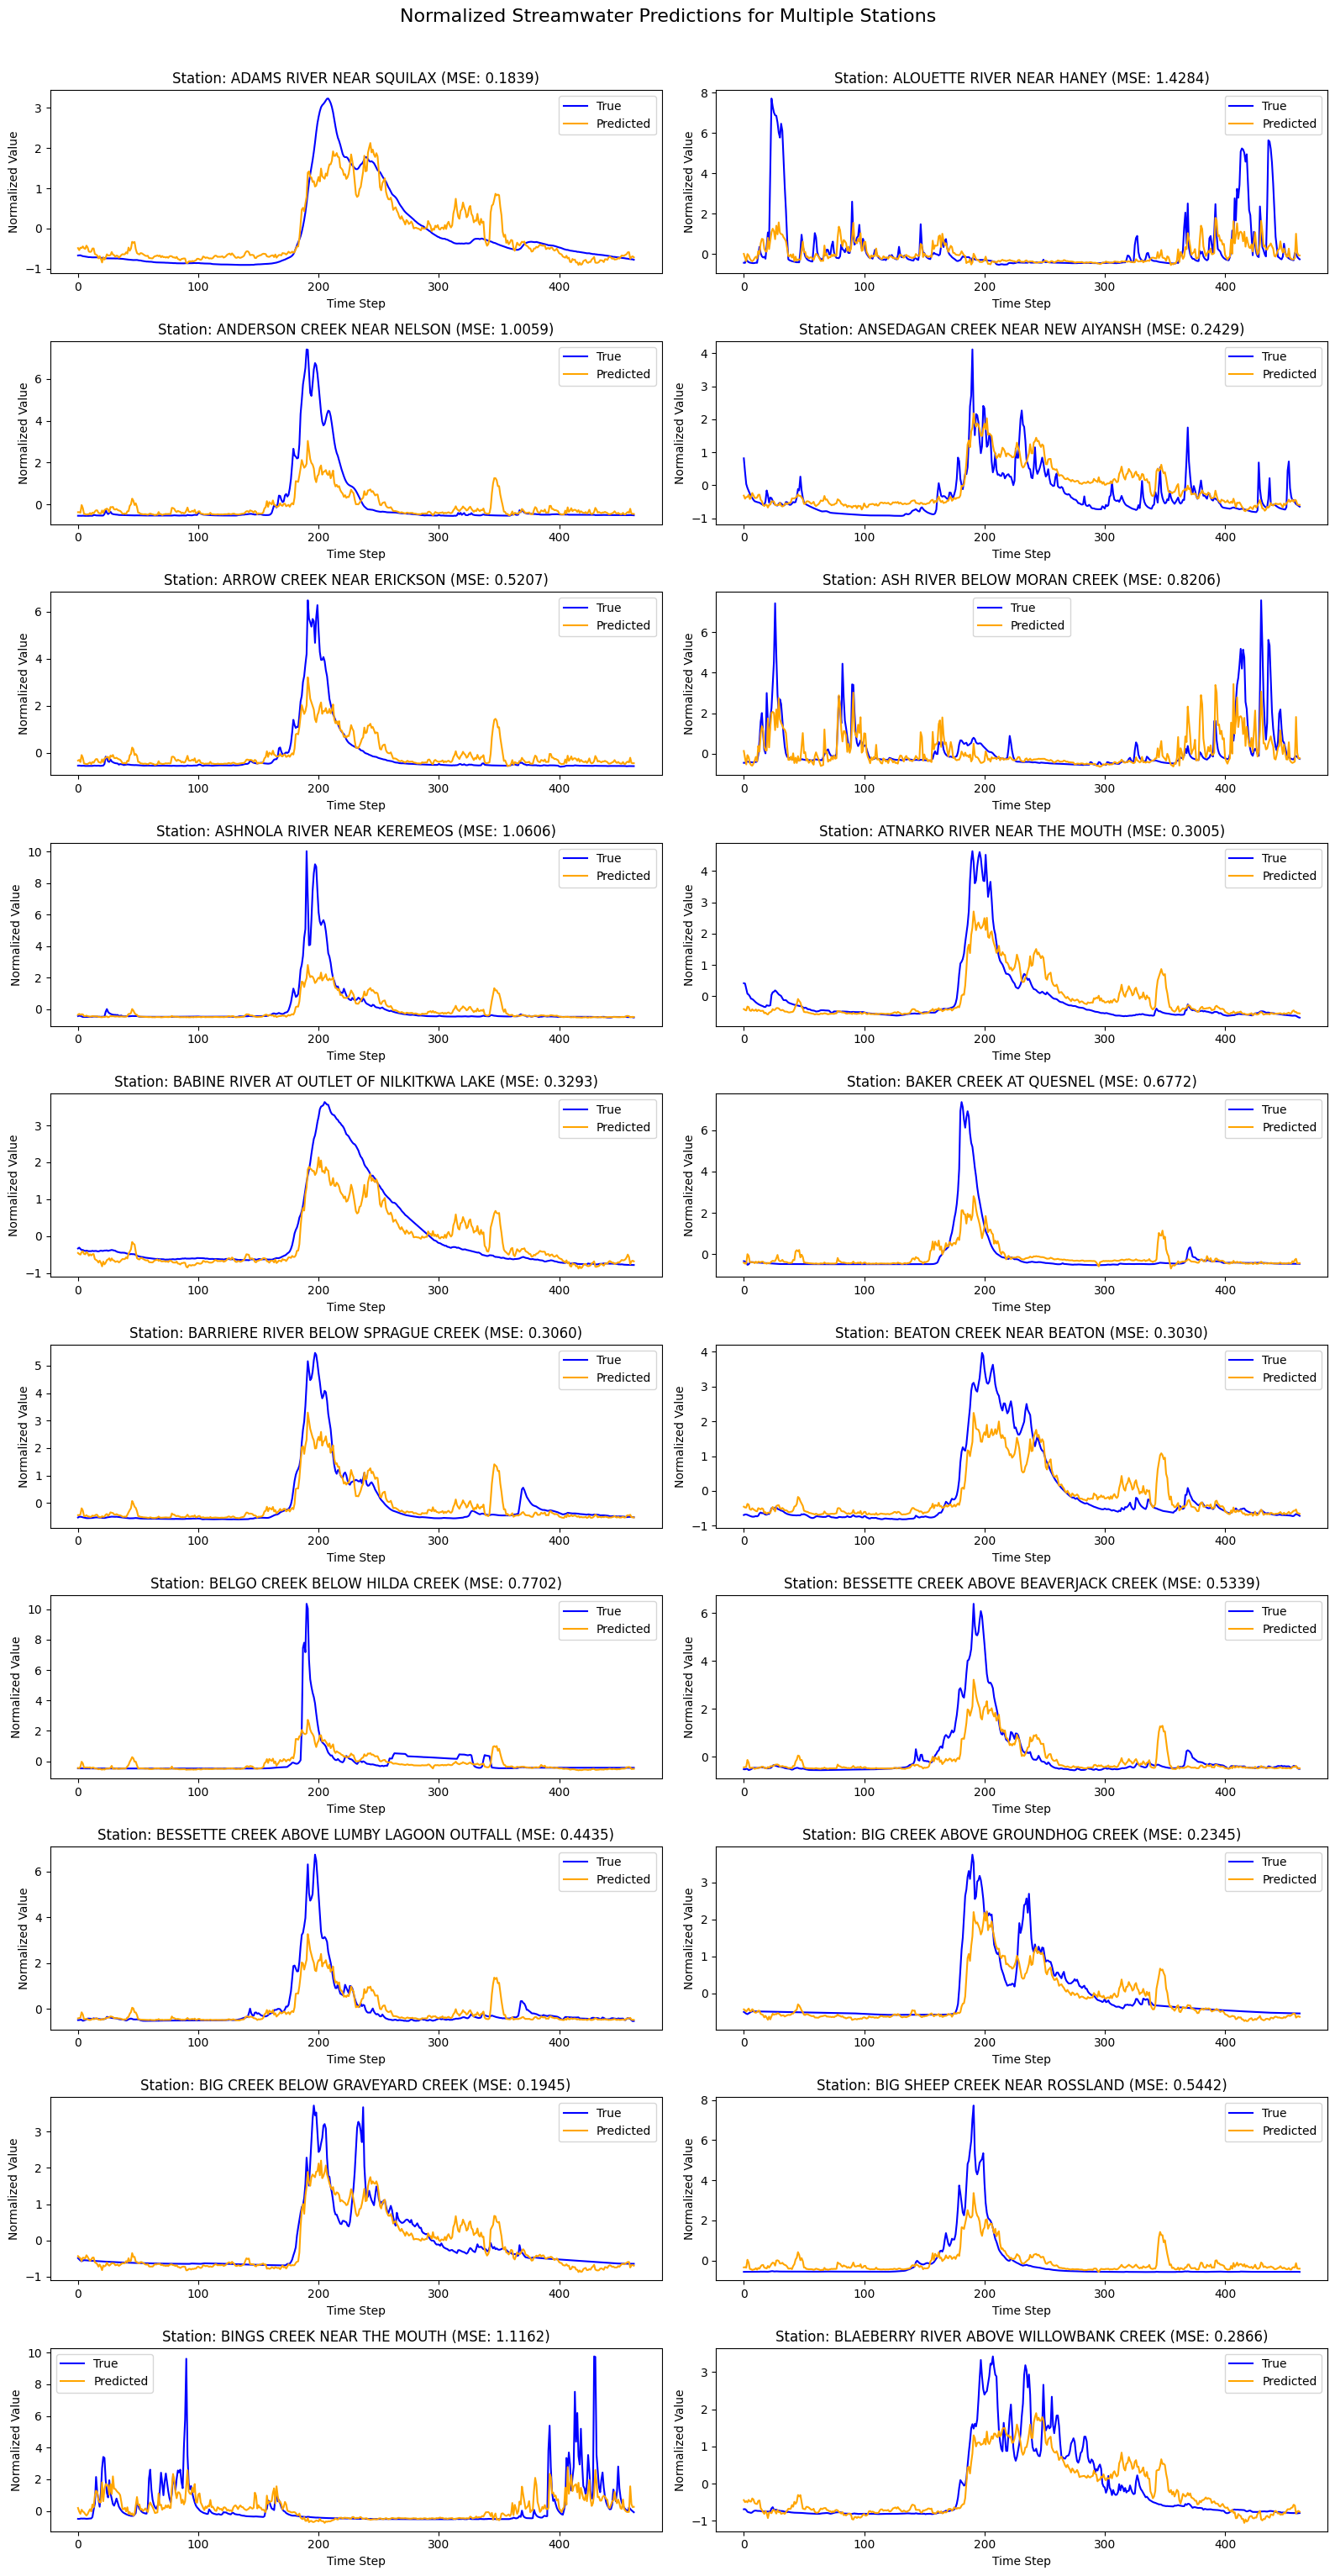

In [31]:
import matplotlib.pyplot as plt

# Define the number of stations to display
num_stations = 20
station_indices = range(num_stations)  # Indices of the stations to plot

# Set up the figure and subplots
fig, axes = plt.subplots(num_stations // 2, 2, figsize=(16, num_stations * 1.5))  # 4 rows, 2 columns
axes = axes.flatten()  # Flatten the axes for easy iteration

# Plot predictions for each station
for i, station in enumerate(station_indices):
    mse = np.mean((y_pred[:, station] - y_val[:, station])**2)
    ax = axes[i]
    station_name = streamwater_data.columns[station]  # Get station name
    ax.plot(y_val[:, station], label='True', color='blue')
    ax.plot(y_pred[:, station], label='Predicted', color='orange')
    ax.set_title(f'Station: {station_name} (MSE: {mse:.4f})')
    ax.legend()
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Normalized Value')

# Adjust layout
plt.tight_layout()
plt.suptitle('Normalized Streamwater Predictions for Multiple Stations', y=1.02, fontsize=16)
plt.show()

# Create a simple LSTM model

In [34]:
x_train.shape

(2435, 42630)

In [52]:
xt_reshaped = x_train.reshape(-1, time_window, n_points)
xv_reshaped = x_val.reshape(-1, time_window, n_points)

# define the LSTM model
model = models.Sequential([
    layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=xt_reshaped.shape[1:]),
    layers.LSTM(64, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(y_train.shape[1])  # Output layer for 241 targets
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    xt_reshaped, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(xv_reshaped, y_val),
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(xv_reshaped, y_val)
print(f"Validation Loss: {loss:.4f}, Validation MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(xv_reshaped)

C:\Users\tbwil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.8166 - mae: 0.5810 - val_loss: 0.6914 - val_mae: 0.4620
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.3999 - mae: 0.3688 - val_loss: 0.6339 - val_mae: 0.4041
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.3677 - mae: 0.3462 - val_loss: 0.5980 - val_mae: 0.3964
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.2863 - mae: 0.2988 - val_loss: 0.5647 - val_mae: 0.3836
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.2744 - mae: 0.2938 - val_loss: 0.5752 - val_mae: 0.4293
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.2625 - mae: 0.2852 - val_loss: 0.5781 - val_mae: 0.3989
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.2595 - mae: 0.2814 - val_loss: 0.6326 - val_mae: 0.3999
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.2447 - mae: 0.2695 - val_loss: 0.6204 - val_mae: 0.4199
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.23